# Image Segmentation Using Python's PixelLib Package: 
Last modified: July 28, 2021

## Useful links / Citations:
https://towardsdatascience.com/custom-instance-segmentation-training-with-7-lines-of-code-ff340851e99b
https://pixellib.readthedocs.io/en/latest/custom_inference.html

## Import PixelLib and load random training photo:
Shows a random training photo with handpicked mask polygon from LabelMe annotation.
Run cell multiple times to make sure your image annotations are showing up as expected.

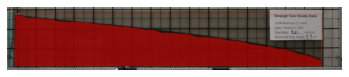

In [1]:
import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset("/Users/sebastianperezlopez/Desktop/PixelLabTesting/SeepageDatasetNEW.nosync")
vis_img.visualize_sample()

## Train model
Load MaskRCNN model, load pre-trained coco weights, set batch size / epochs / data augmentation

In [3]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 1, batch_size = 4)
train_maskrcnn.load_pretrained_model("/Users/sebastianperezlopez/Desktop/PixelLabTesting/COCO Model.nosync/mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("/Users/sebastianperezlopez/Desktop/PixelLabTesting/SeepageDatasetNEW.nosync")
train_maskrcnn.train_model(num_epochs = 4, augmentation=False, path_trained_models = "/Users/sebastianperezlopez/Desktop/PixelLabTesting/mask_rcnn_models.nosync")


Using resnet101 as network backbone For Mask R-CNN model
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
No Augmentation
Train 56 images
Validate 12 images
Checkpoint Path: /Users/sebastianperezlopez/Desktop/PixelLabTesting/mask_rcnn_models.nosync
Selecting layers to train


/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

Epoch 1/4
100/100 [==============================] - 6186s 62s/step - batch: 49.5000 - size: 4.0000 - loss: 1.0373 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.4343 - mrcnn_class_loss: 0.0296 - mrcnn_bbox_loss: 0.2364 - mrcnn_mask_loss: 0.3111 - val_loss: 0.6084 - val_rpn_class_loss: 0.0108 - val_rpn_bbox_loss: 0.2975 - val_mrcnn_class_loss: 0.0055 - val_mrcnn_bbox_loss: 0.1079 - val_mrcnn_mask_loss: 0.1867 - lr: 0.0010
Epoch 2/4
100/100 [==============================] - 6058s 61s/step - batch: 49.5000 - size: 4.0000 - loss: 0.4554 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.2150 - mrcnn_class_loss: 0.0059 - mrcnn_bbox_loss: 0.0845 - mrcnn_mask_loss: 0.1380 - val_loss: 0.3512 - val_rpn_class_loss: 0.0084 - val_rpn_bbox_loss: 0.1383 - val_mrcnn_class_loss: 0.0053 - val_mrcnn_bbox_loss: 0.0467 - val_mrcnn_mask_loss: 0.1526 - lr: 0.0010
Epoch 3/4
100/100 [==============================] - 6017s 60s/step - batch: 49.5000 - size: 4.0000 - loss: 0.2999 - rpn_class_loss: 0.0073 - rpn_bbox_los

## Create segmentation mask on new image using trained model 
Photo output showing predicted mask over original photo

*Set extract_segmented_objects=True if you want a .jpg file with only the segmented part of your original showing. Will appear in the directory of your .ipynb file. 

In [21]:
# Save extracted object (what mask predicts) as a separate file
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 1, class_names= ["BG", "seepage"])
segment_image.load_model('/Users/sebastianperezlopez/Desktop/PixelLabTesting/mask_rcnn_models.nosync/Epoch2_16July') # Put filename of .h5 that has weights you just trained
segment_image.segmentImage("/Users/sebastianperezlopez/Desktop/framefolder.nosync/raw frames/_frame16500.jpg", show_bboxes=False, output_image_name="/Users/sebastianperezlopez/Desktop/framefolder.nosync/mask+image/_frame16500.jpg", extract_segmented_objects=False, save_extracted_objects=True)




Processed image saved successfully in your current working directory.


({'rois': array([[  56,   54,  287, 1132]], dtype=int32),
  'class_ids': array([1], dtype=int32),
  'scores': array([0.9909128], dtype=float32),
  'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]])},
 array([[[106, 106, 106],
     

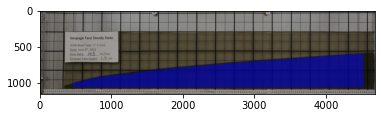

In [14]:
# importing pyplot and image from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading png image file
im = img.imread('/Users/sebastianperezlopez/Desktop/5 epochs/seepageTEST5.jpg')
  
# show image
plt.imshow(im)

## Create segmentation mask on single image using trained model for further image manipulation (no output)
No photo output here; instead, saving segmented mask in segmask variable

In [28]:
import pixellib
from pixellib.instance import custom_segmentation
import matplotlib.pyplot as plt
import matplotlib.image as img

originalImage = '/Users/sebastianperezlopez/Desktop/framefolder.nosync/raw frames/_frame16500.jpg'

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 1, class_names= ["BG", "seepage"])
segment_image.load_model('/Users/sebastianperezlopez/Desktop/PixelLabTesting/mask_rcnn_models.nosync/Epoch2_16July') # Put filename of .h5 that has weights you just trained
segmask, output = segment_image.segmentImage(originalImage, show_bboxes=True, extract_segmented_objects= True)




## Isolate Mask

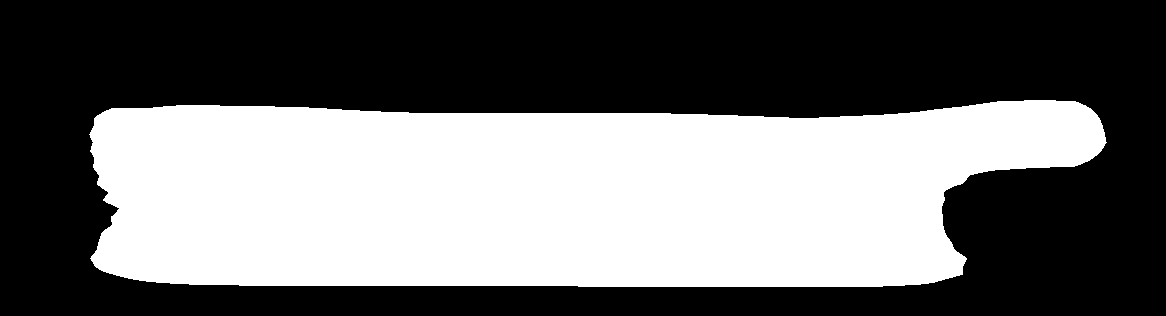

In [29]:
#https://www.codespeedy.com/change-the-pixel-values-of-an-image-in-python/

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy
from numpy import array

outputMask = segmask['masks']

image = img.imread(originalImage)

newImage = Image.new('RGB', (image.shape[1],image.shape[0]), "black")
pixels = newImage.load()

for i in range(newImage.size[0]):
    for j in range(newImage.size[1]):
        if outputMask[j,i] == array([True]):
            pixels[i,j] = (255,255,255)
        if outputMask[j,i] == array([False]): 
            pixels[i,j] = (0,0,0)
            
display(newImage)

newImage.save('/Users/sebastianperezlopez/Desktop/framefolder.nosync/segmented mask/_frame16500.jpg')

#image.shape
#outputMask.shape

#for i in range(newImage.shape[0]):
   # for j in range(newImage.shape[1]):
     #   if outputMask[i, j] == False:
     #       newImage[i, j] = 0
      #  else:
     #       newImage[i, j] = 1

## Isolate Masks' Upper Border

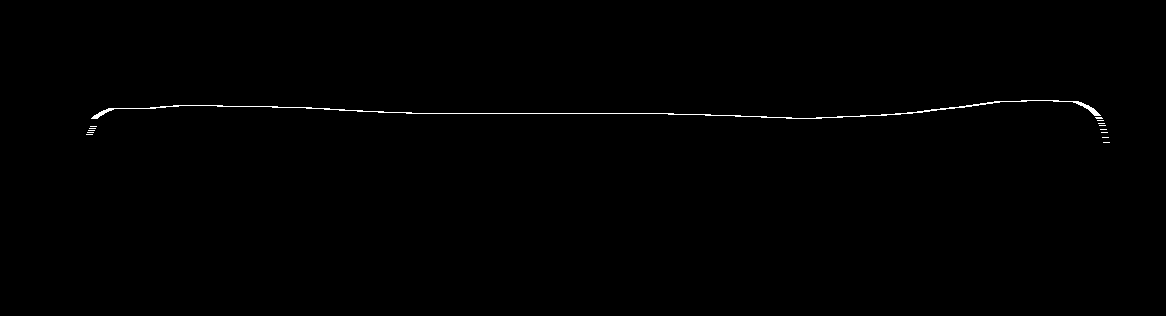

In [30]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy
from numpy import array

outputMask = segmask['masks']

image = img.imread(originalImage)

newImage = Image.new('RGB', (image.shape[1],image.shape[0]), "black")
pixels = newImage.load()

# outputMask = mask
# newImage = size of original image, all black. 


for i in range(newImage.size[0]):
    j = 0
    while outputMask[j,i] == array([False]):
        j += 1
        #if j == 4677: 
        if j == image.shape[0]: 
            break
        if outputMask[j,i] == array([True]):
            pixels[i,j] = (255,255,255)
            pixels[i+1,j] = (255,255,255)
            pixels[i+2,j] = (255,255,255)
            pixels[i+3,j] = (255,255,255)
            pixels[i-1,j] = (255,255,255)
            pixels[i-2,j] = (255,255,255)
            pixels[i-3,j] = (255,255,255)
            break
                

display(newImage)


newImage.save('/Users/sebastianperezlopez/Desktop/framefolder.nosync/segmented border/_frame16500.jpg')

## Analyze a video file and separate frames 

In [18]:
import cv2

video = cv2.VideoCapture("/Users/sebastianperezlopez/Desktop/framefolder.nosync/DSC_7166.mp4")
total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)

for i in range(0, 17784, 500):
    video.set(1, i)
    ret, still = video.read()
    cv2.imwrite(f'/Users/sebastianperezlopez/Desktop/framefolder.nosync/raw frames/_frame{i}.jpg', still)

17784.0
